[0.29 0.27 0.42 ... 0.23 0.13 0.09]


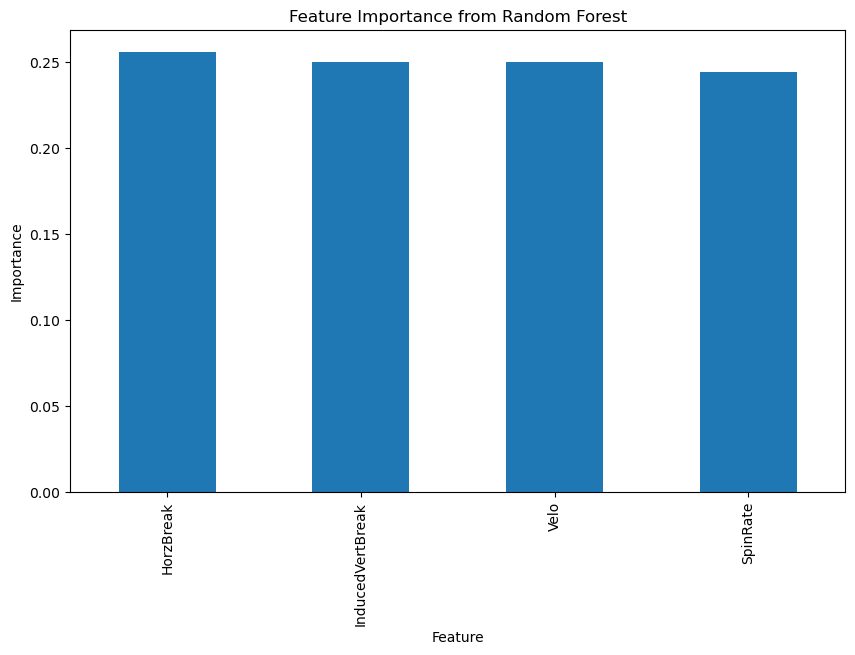

,Velo,SpinRate,HorzBreak,InducedVertBreak,Predicted_InPlay
0,94.72,2375.0,3.10,18.15,0.29
1,95.25,2033.0,11.26,14.50,0.27
2,92.61,2389.0,11.00,21.93,0.42
3,94.94,2360.0,6.84,18.11,0.40
4,97.42,2214.0,16.70,13.38,0.32


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Sep  7 18:14:56 2023

@author: nickarrivo
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


data = pd.read_csv('/Users/nickarrivo/Downloads/training_data_cleaned.csv')
data = data.drop(columns = ['Unnamed: 0'])

# Separate features and target variable
X = data.drop(columns=['InPlay'])
y = data['InPlay']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier with default hyperparameters
rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

# Predict on the test set and calculate accuracy
#y_pred_rf = rf_classifier.predict(X_test)
##rf_accuracy = accuracy_score(y_test, y_pred_rf)
#print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# To make predictions on a new test dataset:
test_data_new = pd.read_csv('/Users/nickarrivo/Downloads/cleaned_deploy.csv') 
test_data_new = test_data_new.drop(columns = ['Unnamed: 0'])
predictions_new = rf_regressor.predict(test_data_new)
print(predictions_new)


# Extract feature importances from the trained Random Forest model
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame for the importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
importance_plot = importance_df_sorted.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6), legend=False)
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance')
plt.show()

test_data_new['Predicted_InPlay'] = predictions_new
test_data_with_pred = test_data_new
test_data_with_pred.head()
#test_data_with_pred.to_csv('/Users/nickarrivo/Downloads/Random Forest Model Predictions.csv')


In [4]:
test_data_with_pred.head()

,Velo,SpinRate,HorzBreak,InducedVertBreak,Predicted_InPlay
0,94.72,2375.0,3.10,18.15,0.29
1,95.25,2033.0,11.26,14.50,0.27
2,92.61,2389.0,11.00,21.93,0.42
3,94.94,2360.0,6.84,18.11,0.40
4,97.42,2214.0,16.70,13.38,0.32


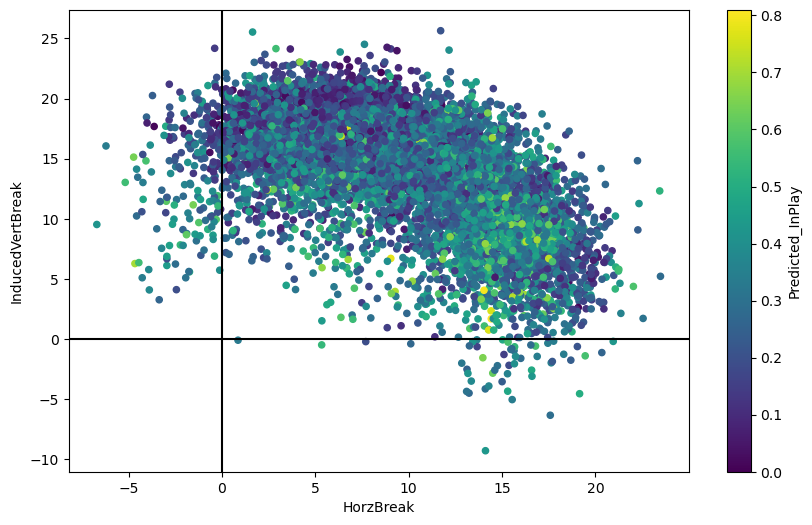

In [26]:
location_plot = test_data_with_pred.plot(kind='scatter', x='HorzBreak', y='InducedVertBreak', figsize=(10,6), c='Predicted_InPlay', colormap='viridis' )
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')

